Data Description:

Unique ID of each anime.
Anime title.
Anime broadcast type, such as TV, OVA, etc.
anime genre.
The number of episodes of each anime.
The average rating for each anime compared to the number of users who gave ratings.


Number of community members for each anime.
Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 
Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.


In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [723]:
df = pd.read_csv('anime.csv')

In [725]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [727]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [729]:
df['episodes'].unique()    # to get the frequency of striing :-  'unknown'

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [731]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [733]:
df = df.dropna()

In [735]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [737]:
df['episodes'] = df['episodes'].astype(str)  

C:\Users\shubham\AppData\Local\Temp\ipykernel_26844\2512478471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episodes'] = df['episodes'].astype(str)


In [739]:
search_string = 'Unknown'

In [741]:
# Count the frequency of the specific string
#frequency = df['episodes'].str.contains(search_string).sum()

 #print(f"The string '{search_string}' appears {frequency} times in the column.")

In [743]:
# Find where the string occurs and get the indices
indices = df[df['episodes'] == search_string].index.tolist()


In [745]:
# Get the frequency of that string
frequency = len(indices)

# Print the results
print(f"The string '{search_string}' appears {frequency} times at indices: {indices}")

The string 'Unknown' appears 187 times at indices: [74, 252, 615, 991, 1021, 1272, 1309, 1928, 1930, 1993, 2030, 2073, 2368, 2530, 2721, 2738, 2777, 2810, 2951, 3051, 3055, 3574, 4735, 4870, 4885, 4975, 5365, 5411, 5500, 5583, 5650, 5655, 5762, 5793, 5920, 5995, 6314, 6335, 6341, 6478, 6629, 6776, 6816, 7573, 7626, 7760, 7842, 7924, 8124, 8126, 8134, 8136, 8142, 8151, 8167, 8200, 8208, 8285, 8289, 8423, 8435, 8437, 8445, 8480, 8498, 8504, 8520, 8521, 8568, 8577, 8587, 8673, 8686, 8687, 8704, 8751, 8768, 8871, 8874, 8890, 8977, 8988, 8989, 9000, 9011, 9024, 9051, 9066, 9100, 9108, 9116, 9118, 9119, 9121, 9147, 9149, 9166, 9200, 9228, 9284, 9295, 9347, 9365, 9374, 9389, 9409, 9411, 9460, 9549, 9585, 9619, 9622, 9641, 9655, 9675, 9689, 9695, 9697, 9699, 9773, 9784, 9790, 9792, 9816, 9854, 9905, 9918, 9919, 9920, 9923, 9960, 9973, 9987, 10001, 10049, 10196, 10197, 10209, 10211, 10252, 10286, 10400, 10474, 10498, 10578, 10591, 10724, 10731, 10752, 10760, 10801, 10836, 10853, 11135, 11145, 1

In [747]:
df['episodes'].mode()

0    1
Name: episodes, dtype: object

In [749]:
# Find the mode of the column
mode_value = df['episodes'].mode()[0]  # mode() returns a Series, so we get the first value
mode_value

'1'

In [751]:
# Replace the string 'apple' with the mode value
df['episodes'] = df['episodes'].replace('Unknown', '1')

C:\Users\shubham\AppData\Local\Temp\ipykernel_26844\3090894416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episodes'] = df['episodes'].replace('Unknown', '1')


In [753]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       '39', '101', '47', '50', '62', '33', '112', '23', '3', '94', '6',
       '8', '14', '7', '40', '15', '203', '77', '291', '120', '102', '96',
       '38', '79', '175', '103', '70', '153', '45', '5', '21', '63', '52',
       '28', '145', '36', '69', '60', '178', '114', '35', '61', '34',
       '109', '20', '9', '49', '366', '97', '48', '78', '358', '155',
       '104', '113', '54', '167', '161', '42', '142', '31', '373', '220',
       '46', '195', '17', '1787', '73', '147', '127', '16', '19', '98',
       '150', '76', '53', '124', '29', '115', '224', '44', '58', '93',
       '154', '92', '67', '172', '86', '30', '276', '59', '72', '330',
       '41', '105', '128', '137', '56', '55', '65', '243', '193', '18',
       '191', '180', '91', '192', '66', '182', '32', '164', '100', '296',
       '694', '95', '68', '117', '151', '130', '87', '170

In [755]:
df['episodes'] = df['episodes'].astype(int)

C:\Users\shubham\AppData\Local\Temp\ipykernel_26844\1785838019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episodes'] = df['episodes'].astype(int)


In [757]:
df.describe()

,anime_id,episodes,rating,members
count,12017.000000,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,12.307980,6.478264,1.834888e+04
std,11231.076675,46.750842,1.023857,5.537250e+04
min,1.000000,1.000000,1.670000,1.200000e+01
25%,3391.000000,1.000000,5.890000,2.250000e+02
50%,9959.000000,2.000000,6.570000,1.552000e+03
75%,23729.000000,12.000000,7.180000,9.588000e+03
max,34519.000000,1818.000000,10.000000,1.013917e+06


In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  int32  
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 704.1+ KB


In [761]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [763]:
df['genre'].value_counts()

genre
Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: count, Length: 3229, dtype: int64

In [765]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Action, Comedy, Hentai, Romance, Supernatural',
       'Hentai, Sports', 'Hentai, Slice of Life'], dtype=object)

In [767]:
df['type'].value_counts()

type
TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
Name: count, dtype: int64

In [769]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

C:\Users\shubham\AppData\Local\Temp\ipykernel_26844\3539123366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = label_encoder.fit_transform(df['type'])


In [771]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",5,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,3,1,4.15,211
12290,5543,Under World,Hentai,3,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,3,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,4.98,175


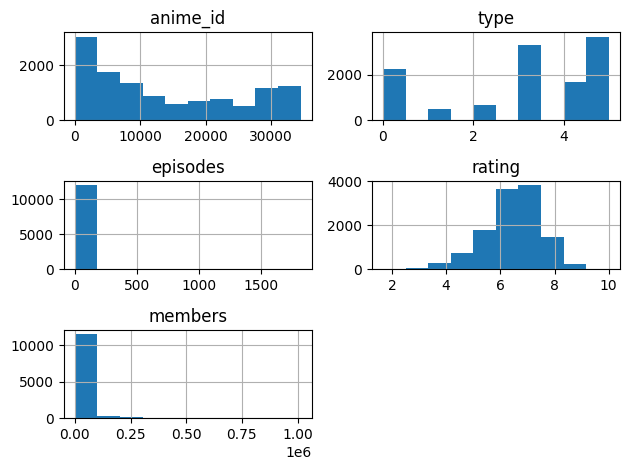

In [773]:
df.hist()
plt.tight_layout()

<Axes: >

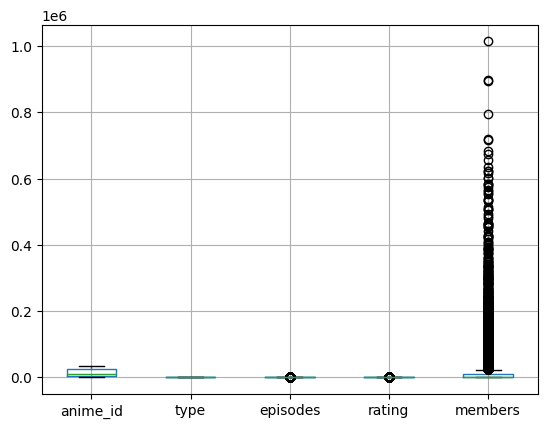

In [774]:
df.boxplot()

In [775]:
df.isna().sum()      # handling missing values

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings

).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.



In [780]:
df.rename(columns={'members':'member_id'},inplace=True)

C:\Users\shubham\AppData\Local\Temp\ipykernel_26844\702192557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'members':'member_id'},inplace=True)


In [782]:
df   # member_id contains same id numbers for different movies , therefore there cant be total 12294 members , so the members must be in repetative 

,anime_id,name,genre,type,episodes,rating,member_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",5,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,3,1,4.15,211
12290,5543,Under World,Hentai,3,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,3,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,4.98,175


In [784]:
df['member_id'].value_counts() 

member_id
60       36
72       36
74       32
67       31
93       31
         ..
2694      1
40858     1
30766     1
96718     1
40318     1
Name: count, Length: 6596, dtype: int64

In [786]:
df['member_id'].unique()

array([200630, 793665, 114262, ...,  27411,  57355,    652], dtype=int64)

In [788]:
df[(df['member_id']==175)]     # for member_id number 175 , he has watched the number of anime movies , with its anime_id , its genre , type and number of episodes 

,anime_id,name,genre,type,episodes,rating,member_id
5837,8848,"Oishinbo: Kyuukyoku tai Shikou, Chouju Ryouri ...","Comedy, Seinen, Slice of Life",0,1,6.34,175
6872,31830,lilac (bombs Jun Togawa),Music,1,1,5.88,175
8077,17501,Abe George Kattobi Seishun Ki: Shibuya Honky Tonk,"Drama, Ecchi",3,4,4.79,175
8349,7354,Chikara to Onna no Yo no Naka,Historical,0,1,5.31,175
8672,29716,Ginga Tetsudou 999: Shounen no Tabidachi to Wa...,"Adventure, Drama, Sci-Fi, Space",4,1,6.22,175
9469,3180,Manga Aesop Monogatari (TV),"Comedy, Fantasy, Kids",5,52,6.50,175
9850,31057,Onaka Hime,Fantasy,2,3,4.50,175
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,4.98,175


In [790]:
df[(df['member_id']==13)]      # for member_id = 13

,anime_id,name,genre,type,episodes,rating,member_id
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",0,1,10.0,13


In [792]:
# soritng the values of member_id
df.sort_values('member_id')

,anime_id,name,genre,type,episodes,rating,member_id
10444,34490,Sushi Azarashi,Comedy,5,30,3.00,12
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",0,1,10.00,13
8367,34259,Chotto Ugoku!? &quot;Futeneko&quot;,Comedy,3,1,6.00,17
9805,34363,Ocha-ken: Ryokutto Monogatari,"Kids, Slice of Life",5,13,8.00,20
10500,33822,Ten ni Yaka Reru: E ni Yoru Shougen,"Drama, Historical",3,1,7.00,20
...,...,...,...,...,...,...,...
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",5,13,8.39,717796
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",5,25,7.83,893100
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",5,25,8.54,896229


In [794]:
df.shape # here total for rows 12294 , total members are not 12294 , from this count there must be some member_id which are repetative , for different movie 
# names , genre , episodes and etc

(12017, 7)

In [796]:
# number of unique members in the dataset
len(df.member_id.unique())

6596

In [798]:
(df['member_id'].value_counts()).shape[0]      # numner of unique rows for particular single member_id

6596

In [800]:
df['rating'].value_counts()     # here ratings are also repetative as per members given for the anime movies

rating
6.00    141
7.00     98
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [802]:
len(df.name.unique())

12015

In [804]:
df['name'].value_counts()   # unique movie name and along with its frequencies

name
Shi Wan Ge Leng Xiaohua                                                                            2
Saru Kani Gassen                                                                                   2
CCW: Crazy Clay Wrestling                                                                          1
Crayon Angel                                                                                       1
Koumon-teki Juuku Ketsujiru Juke                                                                   1
                                                                                                  ..
Bakusou Kyoudai Let&#039;s &amp; Go!! WGP Bousou Mini Yonku Daitsuiseki                            1
Beet the Vandel Buster Excellion                                                                   1
Black Jack ONA                                                                                     1
Crayon Shin-chan Manatsu no Yoru ni Ora Sanjou! Arashi wo Yobu Den-O vs. Shin-O 60-bu 

Recommendation System:


Design a function to recommend anime based on cosine similarity.
Given a target anime, recommend a list of similar anime based on cosine similarity scores.
Experiment with different threshold values for similarity scores to adjust the recommendation list size.


In [807]:
# so therefore as there are repetative members , and we need to compare row by row , so to suggest the the next member the new movie to watch , 
# so we will make the movie names as unique column names , and will create a matrix where , row will indicate as unique member_id
# the column will indicate as unique movie names and matrix values will be filled with rating given by each member_id to the movie name ,
# and similar kind / type of members will be compared and new movies will be recommendated .

In [808]:
# change structure of dataset so that we can compute the similarity score
movies_df = df.pivot(index='member_id',       # row = member_id
                      columns='name',            # col = name
                       values='rating')     # values= ratings

In [809]:
movies_df
# NaN - member did not watch movie so he didn't give rating . now we can recommend those(not watched ) movies to him

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
member_id,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [810]:
# impute those NaNs with 0 values  , where 0 :- not watch movie
movies_df.fillna(0,inplace=True)

In [815]:
movies_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
member_id,,,,,,,,,,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [817]:
movies_df['&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu'].value_counts()

&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu
0.0    6595
5.0       1
Name: count, dtype: int64

In [819]:
movies_df['&quot;Eiji&quot;'].value_counts()

&quot;Eiji&quot;
0.00    6595
6.13       1
Name: count, dtype: int64

In [821]:
movies_df['.hack//G.U. Trilogy'].value_counts()

.hack//G.U. Trilogy
0.00    6595
7.32       1
Name: count, dtype: int64

In [823]:
# calculating Cosine similairty between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine , correlation

In [825]:
# User similarity - pairwise - taking 2 rows at a time it will compute distance
# That distance is scaled between 0 to 1
# Suppose distance between 2 rows is 0.  We want similarity, not a distance.
# That is calculated as Similarity=1-distance. So 1-0=1. i.e. similarity in rows is 1.
# Suppose distance is 0.9. So 1-0.9=0.1
member_sim = 1 - pairwise_distances(movies_df.values,metric='cosine')

# pairwise_distances(..., metric='cosine') calculates pairwise distances between rows (users) in this matrix using the cosine distance metric.
# 1 - pairwise_distances(...) converts distances to similarities.
# Cosine distance ranges from 0 to 2, where 0 indicates no distance and 2 indicates maximum distance,
# so subtracting from 1 inverts this to give cosine similarity which ranges from -1 to 1.

In [826]:
member_sim    # this is similairty matrix - diagonal values are 1 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [827]:
np.fill_diagonal(member_sim,0) # but as we want values as 1 to be counted , to recommend other member , but value 1 is for all diagonal also 
# so therefore we will fill diagonal with 0 , so that for particular member we will get the perfect value as 1 , and it gets easy

In [828]:
member_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [829]:
# store the results in a dataframe 
sim_df = pd.DataFrame(member_sim)

In [830]:
sim_df # so here it took the index as a column names , so we need unique member_id as columns and rows

,0,1,2,3,4,5,6,7,8,9,...,6586,6587,6588,6589,6590,6591,6592,6593,6594,6595
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [831]:
# set the index and column names to member ids
sim_df.index = df.member_id.unique()
sim_df.columns = df.member_id.unique()

In [839]:
sim_df

,200630,793665,114262,673572,151266,93351,425855,80679,72534,81109,...,838,1092,2413,3374,4550,5551,29463,27411,57355,652
200630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [841]:
# idxmax() method returns a Series with the index of the maximum value for each column. (row 3 anc col 11 has highest value as 1)
# By specifying the column axis (axis='columns' or 1), the idxmax() method returns a Series with the index of the maximum value for each row.
sim_df.idxmax(axis=1)

200630    200630
793665    200630
114262    200630
673572    200630
151266    200630
           ...  
5551      200630
29463     200630
27411     200630
57355     200630
652       200630
Length: 6596, dtype: int64

In [843]:
#Most Similar Users
sim_df.idxmax(axis=1)[0:10]

200630    200630
793665    200630
114262    200630
673572    200630
151266    200630
93351     200630
425855    200630
80679     200630
72534     200630
81109     200630
dtype: int64

In [845]:
df[(df['member_id']==793665) | (df['member_id']==200630)]

,anime_id,name,genre,type,episodes,rating,member_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665


In [847]:
df[(df['member_id']==93351) | (df['member_id']==175)]   

,anime_id,name,genre,type,episodes,rating,member_id
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",5,10,9.15,93351
5837,8848,"Oishinbo: Kyuukyoku tai Shikou, Chouju Ryouri ...","Comedy, Seinen, Slice of Life",0,1,6.34,175
6872,31830,lilac (bombs Jun Togawa),Music,1,1,5.88,175
8077,17501,Abe George Kattobi Seishun Ki: Shibuya Honky Tonk,"Drama, Ecchi",3,4,4.79,175
8349,7354,Chikara to Onna no Yo no Naka,Historical,0,1,5.31,175
8672,29716,Ginga Tetsudou 999: Shounen no Tabidachi to Wa...,"Adventure, Drama, Sci-Fi, Space",4,1,6.22,175
9469,3180,Manga Aesop Monogatari (TV),"Comedy, Fantasy, Kids",5,52,6.50,175
9850,31057,Onaka Hime,Fantasy,2,3,4.50,175
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,4.98,175


In [849]:
df[(df['member_id']==175) | (df['member_id']==13)]  # so member_id 13 and 175 have similar approach as 2 movies were similar 
# so movies which are not seen by member id 13 is suggested by the movies seen by member id 175

,anime_id,name,genre,type,episodes,rating,member_id
5837,8848,"Oishinbo: Kyuukyoku tai Shikou, Chouju Ryouri ...","Comedy, Seinen, Slice of Life",0,1,6.34,175
6872,31830,lilac (bombs Jun Togawa),Music,1,1,5.88,175
8077,17501,Abe George Kattobi Seishun Ki: Shibuya Honky Tonk,"Drama, Ecchi",3,4,4.79,175
8349,7354,Chikara to Onna no Yo no Naka,Historical,0,1,5.31,175
8672,29716,Ginga Tetsudou 999: Shounen no Tabidachi to Wa...,"Adventure, Drama, Sci-Fi, Space",4,1,6.22,175
9469,3180,Manga Aesop Monogatari (TV),"Comedy, Fantasy, Kids",5,52,6.50,175
9850,31057,Onaka Hime,Fantasy,2,3,4.50,175
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",0,1,10.00,13
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,4.98,175


In [851]:
 # so here we can recommend  or suggest the particular member_id , to watch the particular movie , which is also seen by the similar type of person

***working on other features , with other techniques***

In [854]:
# considering :- episodes and ratings

In [856]:
df

,anime_id,name,genre,type,episodes,rating,member_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",5,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,3,1,4.15,211
12290,5543,Under World,Hentai,3,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,3,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,4.98,175


In [858]:
df.isna().sum()

anime_id     0
name         0
genre        0
type         0
episodes     0
rating       0
member_id    0
dtype: int64

In [860]:
# Example: If genre is in a comma-separated string format
df['genre'] = df['genre'].fillna('')
genre_dummies = df['genre'].str.get_dummies(sep=',')
df = pd.concat([df, genre_dummies], axis=1)

C:\Users\shubham\AppData\Local\Temp\ipykernel_26844\3867514579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].fillna('')


In [861]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['rating', 'episodes']] = scaler.fit_transform(df[['rating', 'episodes']])

In [864]:
# Select the columns for the feature matrix
features = genre_dummies.columns.tolist() + ['rating', 'episodes']
feature_matrix = df[features]

In [866]:
features

[' Adventure',
 ' Cars',
 ' Comedy',
 ' Dementia',
 ' Demons',
 ' Drama',
 ' Ecchi',
 ' Fantasy',
 ' Game',
 ' Harem',
 ' Hentai',
 ' Historical',
 ' Horror',
 ' Josei',
 ' Kids',
 ' Magic',
 ' Martial Arts',
 ' Mecha',
 ' Military',
 ' Music',
 ' Mystery',
 ' Parody',
 ' Police',
 ' Psychological',
 ' Romance',
 ' Samurai',
 ' School',
 ' Sci-Fi',
 ' Seinen',
 ' Shoujo',
 ' Shoujo Ai',
 ' Shounen',
 ' Shounen Ai',
 ' Slice of Life',
 ' Space',
 ' Sports',
 ' Super Power',
 ' Supernatural',
 ' Thriller',
 ' Vampire',
 ' Yaoi',
 ' Yuri',
 'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shounen',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Va

In [867]:
feature_matrix

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,rating,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.924370,0.000000
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0.911164,0.034673
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.909964,0.027518
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.900360,0.012658
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.899160,0.027518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.297719,0.000000
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.313325,0.000000
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.385354,0.001651
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.397359,0.000000


In [871]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(feature_matrix)

In [872]:
def get_recommendations(title, similarity_matrix, df, threshold=0.5):
    # Get index of the target anime
    idx = df.index[df['genre'] == title][0]
    
    # Get similarity scores for that anime
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Sort by similarity score in descending order and filter by threshold
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [i for i in sim_scores if i[1] > threshold]
    
    # Get anime titles for recommendations
    anime_indices = [i[0] for i in sim_scores[1:]]  # skip the first entry (the anime itself)
    return df['genre'].iloc[anime_indices]


Evaluation
:

Split the dataset into training and testing sets.
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
Analyze the performance of the recommendation system and identify areas of improvement.


In [874]:
from sklearn.model_selection import train_test_split

In [876]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [879]:
train_df

,anime_id,name,genre,type,episodes,rating,member_id,Adventure,Cars,Comedy,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
909,9201,Air Gear: Kuro no Hane to Nemuri no Mori - Bre...,"Action, Comedy, Ecchi, Shounen, Sports",3,0.001101,0.732293,40176,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7480,32811,Black Ocean,Music,1,0.000000,0.445378,83,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,416,Kurenai no Buta,"Action, Adventure, Comedy, Drama, Historical, ...",0,0.000000,0.763505,74028,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9204,28965,Kibun wa Uaa Jitsuzai OL Kouza,"Comedy, Seinen",3,0.000000,0.499400,51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6846,31972,Tang Lang Bu Chan,Historical,0,0.000000,0.507803,112,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,13051,Bishoujo Animerama: Miyuki-chan SOS-H Shichauzo,Hentai,3,0.000000,0.398559,235,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5193,5917,Tsuru ni Notte: Tomoko no Bouken,Drama,0,0.000000,0.583433,321,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5392,3880,Makyou Densetsu Acrobunch,"Mecha, Sci-Fi, Shounen",5,0.012658,0.576230,318,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,22819,Aikatsu! Movie,"Music, School, Shoujo, Slice of Life",0,0.000000,0.734694,2813,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [881]:
test_df

,anime_id,name,genre,type,episodes,rating,member_id,Adventure,Cars,Comedy,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
6211,556,Koutetsu Tenshi Kurumi Zero,"Drama, Romance, Sci-Fi",3,0.001101,0.545018,3896,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4674,21599,Fight Ippatsu! Juuden-chan!! OVA,"Comedy, Ecchi, Sci-Fi",3,0.000000,0.599040,1285,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8530,26209,Examurai Sengoku Recap,"Action, Samurai",4,0.000000,0.399760,108,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6499,1037,Saint Beast: Seijuu Kourin-hen,"Action, Fantasy, Magic, Supernatural",5,0.002752,0.530612,6177,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,1089,Macross: Do You Remember Love?,"Action, Mecha, Military, Music, Romance, Sci-F...",0,0.000000,0.770708,19240,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,8249,Votoms Finder,"Action, Drama, Mecha, Military, Sci-Fi",3,0.000000,0.566627,1735,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3916,22661,One Piece: Cry Heart,"Fantasy, Shounen",4,0.001101,0.621849,3417,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2140,6988,Doraemon Movie 30: Nobita no Ningyo Daikaisen,"Adventure, Comedy, Fantasy, Kids, Shounen",0,0.000000,0.680672,1191,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11413,2377,Kisaku,Hentai,3,0.002752,0.599040,1563,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [883]:
# Recompute the feature matrix and similarity matrix for the training set
train_features = train_df[features]
similarity_matrix_train = cosine_similarity(train_features)

In [885]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [902]:
def evaluate_recommendations(true_relevant, recommended):
    precision = precision_score(true_relevant, recommended)
    recall = recall_score(true_relevant, recommended)
    f1 = f1_score(true_relevant, recommended)

    return precision, recall, f1



In [904]:
df['rating'].values

array([0.92436975, 0.91116447, 0.90996399, ..., 0.38535414, 0.39735894,
       0.45498199])

In [906]:
df['episodes'].values

array([0.        , 0.03467254, 0.02751789, ..., 0.00165107, 0.        ,
       0.        ])

In [908]:
true_relevant = df['rating'].values
recommended = df['episodes'].values

In [910]:
true_relevant = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0])
recommended = np.array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [912]:
precision, recall, f1 = evaluate_recommendations(true_relevant, recommended)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.75
Recall: 0.60
F1-score: 0.67


Interview Questions:


1. Can you explain the difference between user-based and item-based collaborative filtering

   
User-based collaborative filtering recommends items by finding users with similar behavior or preferences to a given user.
Item-based collaborative filtering recommends items by finding items that are similar to the items the user has previously liked or interacted with.


3
2. What is collaborative filtering, and how does it wor


Collaborative filtering is a recommendation method that relies on past interactions between users and items. It works by identifying patterns in user-item interactions, such as users who have similar preferences or items that are commonly liked together, to make recommendations for new users or items.k?